<a href="https://colab.research.google.com/github/jackqk/sklearn-note/blob/master/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kNN**

# **一、数据准备**

In [1]:
import numpy as np
import pandas as pd

fruits = pd.read_csv('https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/fruit_data_with_colors.txt', sep='\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
# create a map label to name
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## 检查数据

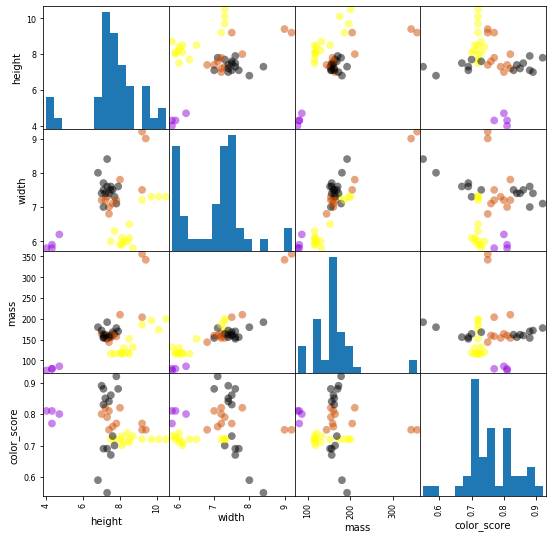

In [3]:
from sklearn.model_selection import train_test_split
from matplotlib import cm
from pandas.plotting import scatter_matrix

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=60, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


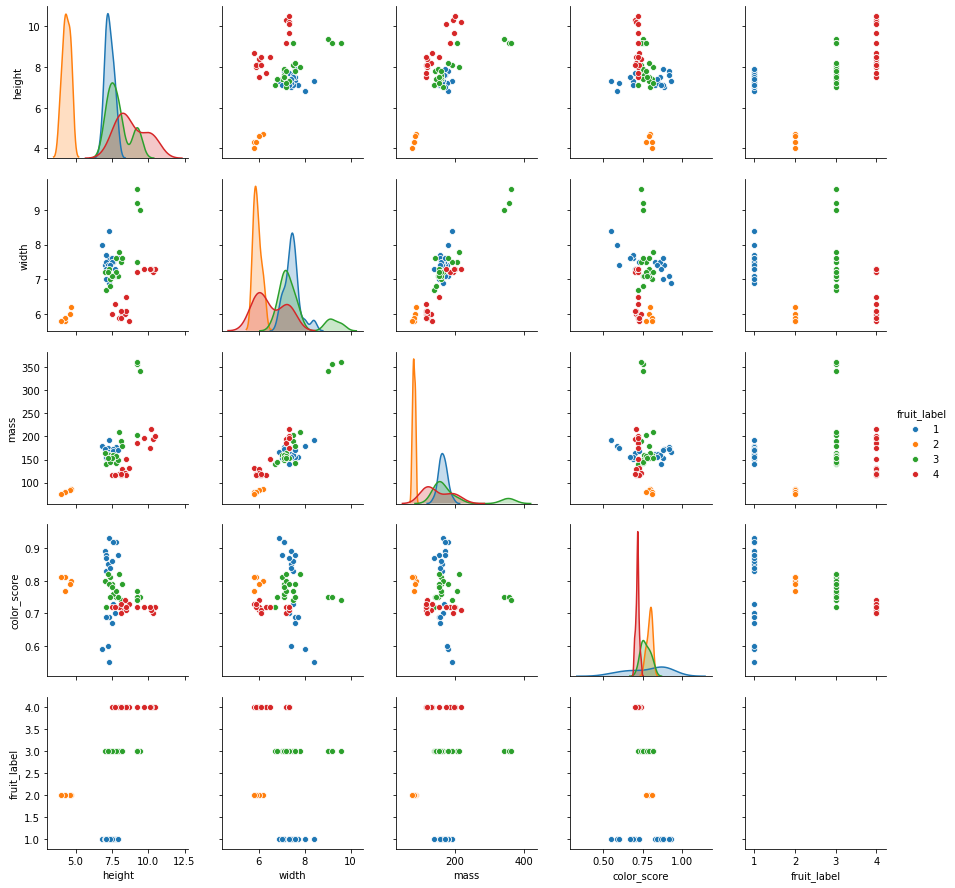

In [4]:
import seaborn as sns

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sns.pairplot(fruits[['height', 'width', 'mass', 'color_score', 'fruit_label']], hue='fruit_label') ;

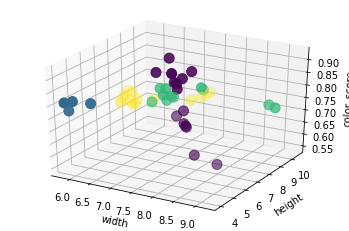

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show() 

## 分割数据

In [6]:
from sklearn.model_selection import train_test_split
X = fruits[['height','width','mass']]
y = fruits['fruit_label']
#random_state就是随机数种子
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 3), (15, 3), (44,), (15,))

# **二、机器学习**

## Create classifier object

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

## Train the claissifier(fit the estimator) using the training data

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

## Use the trained k_NN classifier model to classifty new, previously unseen objects

In [14]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [21]:
fruit_prediction = knn.predict([[1000, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

## k选择

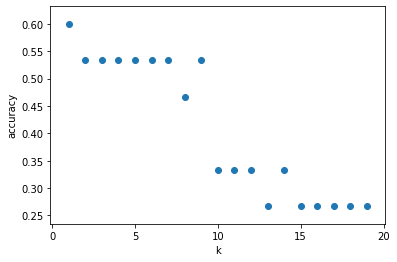

In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks([0,5,10,15,20])
plt.scatter(k_range, scores)
